In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
Cars = pd.read_csv(r"C:\Users\frank\PythonPrograms\USA_cars_datasets.csv")

In [6]:
Cars

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age_category
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,Older (<=2015)
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,Older (<=2015)
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,Newer (2016+)
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,Older (<=2015)
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,Newer (2016+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left,Newer (2016+)
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left,Newer (2016+)
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left,Newer (2016+)
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left,Newer (2016+)


In [7]:
#Cars.count()

In [8]:
#Cars.isnull().sum()

In [74]:
#What is the average price of vehicles listed in the dataset?

average_price = Cars['price'].mean()

print(f"The average price is: {average_price}")

The average price is: 18767.671468587436


In [13]:
# Which brand has the highest number of listings?

# Group the data by brand and count listings
brand_counts = Cars.groupby('brand').size()

# Sort in descending order to find the brand with the highest number of listings
top_brand = brand_counts.sort_values(ascending=False).head(5)

# Display the result
print(f"The top 5 brands are:{top_brand}")


The top 5 brands are:brand
ford         1235
dodge         432
nissan        312
chevrolet     297
gmc            42
dtype: int64


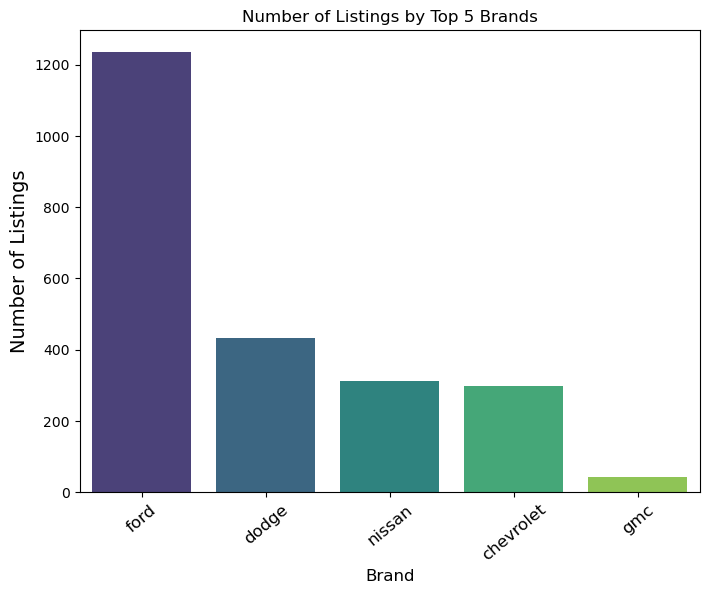

In [14]:
# Visualize above results

# Group the data by brand and count listings
brand_counts = Cars['brand'].value_counts()

# Select the top 5 brands
top_5_brands = brand_counts.head(5)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette='viridis')
plt.title('Number of Listings by Top 5 Brands', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=40, fontsize=12)
plt.show()

In [72]:
# What is the average mileage of cars by brand and model?

# Group by brand and model, then calculate the average mileage
avg_mileage = Cars.groupby(['brand', 'model'])['mileage'].mean()

# Convert the result to a DataFrame for better readability
avg_mileage_Cars = avg_mileage.reset_index()

# Optionally sort by mileage
avg_mileage_Cars_sorted = avg_mileage_Cars.sort_values(by='mileage', ascending=False)

# Display the result
print(avg_mileage_Cars_sorted)


         brand     model        mileage
177  peterbilt     truck  725615.750000
179     toyota   cruiser  274117.000000
34   chevrolet    pickup  260654.333333
95        ford    pickup  206274.833333
67        ford     cargo  190994.000000
..         ...       ...            ...
157     nissan     cargo     264.000000
113  heartland   country       1.000000
114  heartland   pioneer       1.000000
115  heartland  sundance       1.000000
116  heartland     trail       1.000000

[180 rows x 3 columns]


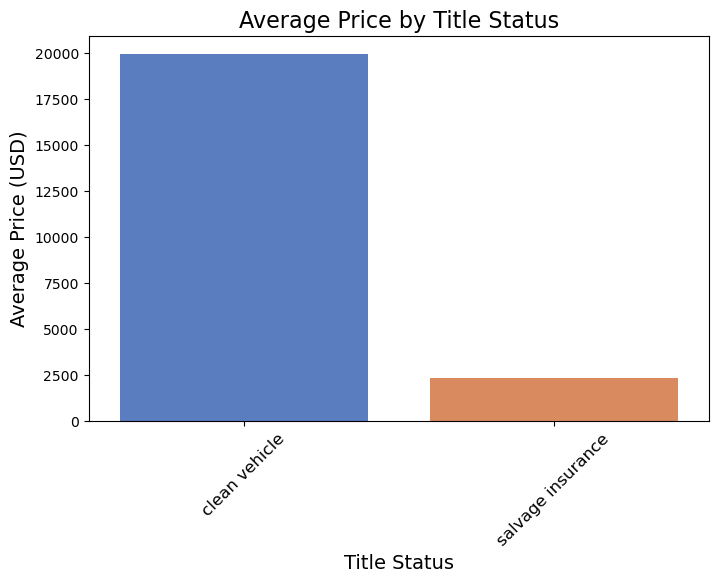

In [105]:
#How does the average price vary between clean and salvage title vehicles?

# Group by title_status and calculate the average price
avg_price_by_title = Cars.groupby('title_status')['price'].mean()

# Convert to a DataFrame for better readability
avg_price_df = avg_price_by_title.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_df, x='title_status', y='price', palette='muted')
plt.title('Average Price by Title Status', fontsize=16)
plt.xlabel('Title Status', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

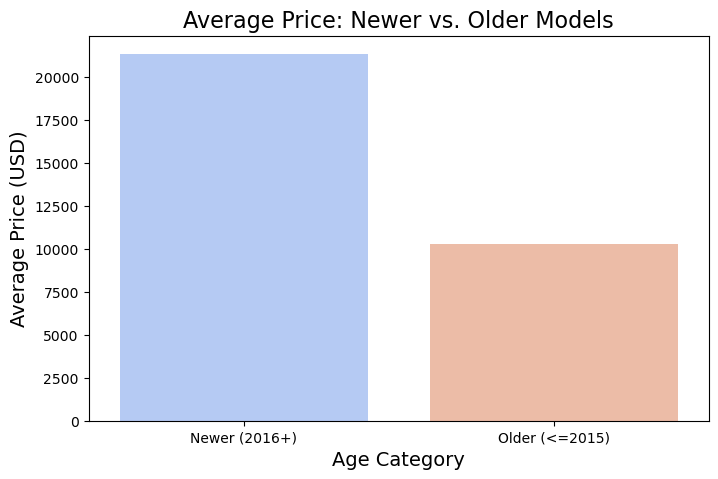

In [5]:
# Are newer models (e.g., after 2015) priced significantly higher than older ones?

# Categorize cars into newer and older models
Cars['age_category'] = Cars['year'].apply(lambda x: 'Newer (2016+)' if x > 2015 else 'Older (<=2015)')

# Calculate the average price for each category
average_price_by_age = Cars.groupby('age_category')['price'].mean()

# Convert to DataFrame for better readability
average_price_Cars = average_price_by_age.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=average_price_Cars, x='age_category', y='price', palette='coolwarm')
plt.title('Average Price: Newer vs. Older Models', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.show()



In [110]:
# What is the price difference between cars with the same model but different colors?

# Group by model and color, and calculate the average price
price_by_model_color = Cars.groupby(['model', 'color'])['price'].mean().reset_index()

# Pivot the data for easier comparison of colors within each model
pivot_data = price_by_model_color.pivot(index='model', columns='color', values='price')

# Calculate the price differences between colors for each model
price_diff = pivot_data.max(axis=1) - pivot_data.min(axis=1)

# Combine results into a summary DataFrame
price_diff_df = price_diff.reset_index(name='price_difference')
price_diff_df = price_diff_df.sort_values(by='price_difference', ascending=False)

# Display the result
print(price_diff_df)


           model  price_difference
14    challenger      48200.000000
35           drw      42133.333333
32          door      30995.000000
33         doors      30001.000000
122        wagon      29872.307692
..           ...               ...
21   convertible          0.000000
87            q5          0.000000
90   road/street          0.000000
92            se          0.000000
126       xterra          0.000000

[127 rows x 2 columns]


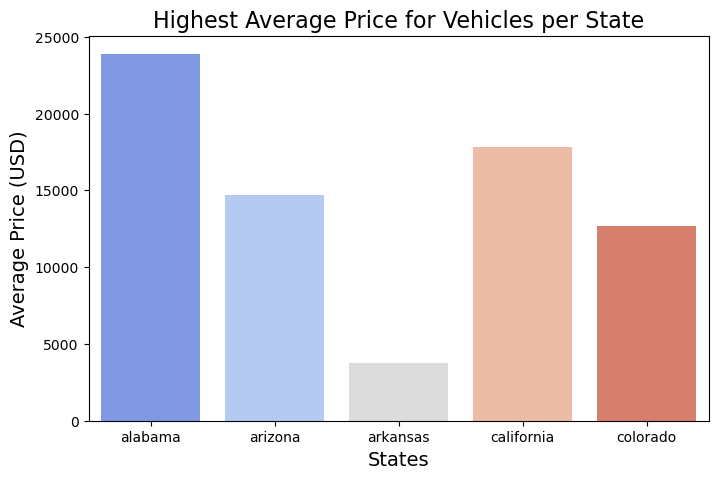

In [130]:
# Which state has the highest average price for vehicles?
highest_average_price = Cars.groupby('state')['price'].mean().reset_index()

#print(highest_average_price.head(5))

plt.figure(figsize=(8, 5))
sns.barplot(data=highest_average_price.head(5), x='state', y='price', palette='coolwarm')
plt.title('Highest Average Price for Vehicles per State', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.show()

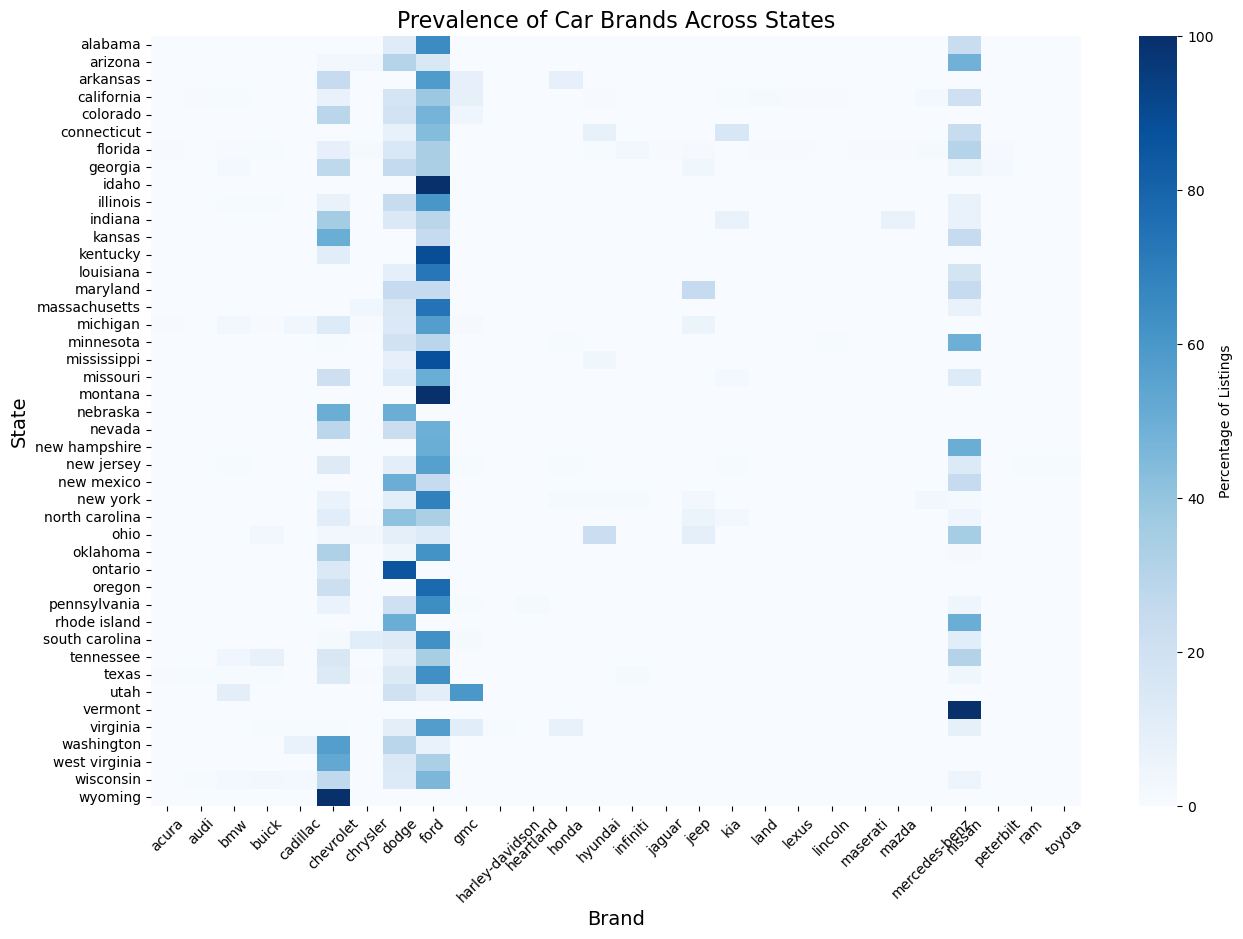

In [135]:
#Are there specific brands more prevalent in certain states?

# Group by state and brand, and count the number of listings
brand_state_counts = Cars.groupby(['state', 'brand']).size().reset_index(name='count')

# Pivot the data to make states rows and brands columns
brand_state_pivot = brand_state_counts.pivot(index='state', columns='brand', values='count').fillna(0)

# Normalize the data by state to calculate percentage prevalence
brand_state_percentage = brand_state_pivot.div(brand_state_pivot.sum(axis=1), axis=0) * 100

# Plot a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(brand_state_percentage, cmap='Blues', annot=False, cbar_kws={'label': 'Percentage of Listings'})
plt.title('Prevalence of Car Brands Across States', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


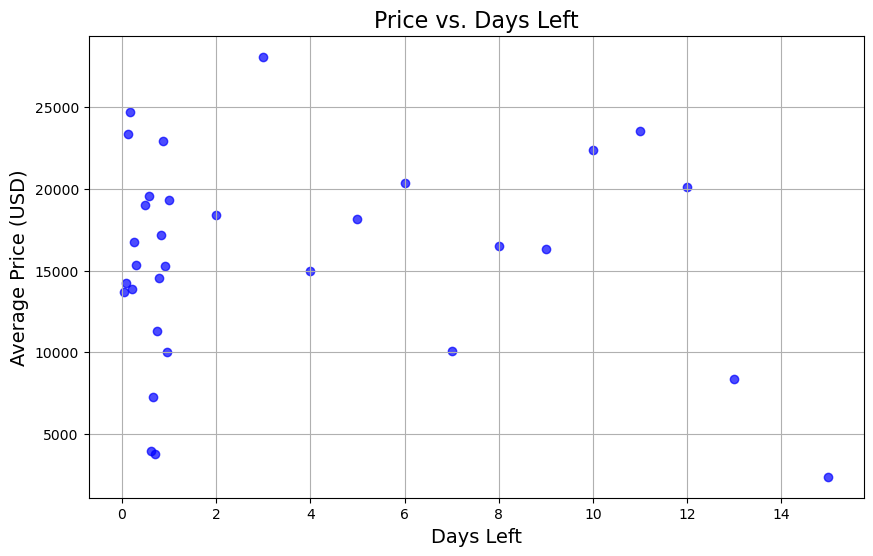

In [136]:
# Do cars with fewer days left have lower prices compared to recently listed vehicles?

# Extract numeric values from the 'condition' column
def extract_days(condition):
    if 'days' in condition:
        return int(condition.split(' ')[0])
    elif 'hours' in condition:
        return int(condition.split(' ')[0]) / 24
    else:
        return np.nan

# Apply the function to create a new column
Cars['days_left'] = Cars['condition'].apply(extract_days)

# Group by days_left (or bin into ranges) and calculate the average price
price_by_days = Cars.groupby('days_left')['price'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(price_by_days['days_left'], price_by_days['price'], color='blue', alpha=0.7)
plt.title('Price vs. Days Left', fontsize=16)
plt.xlabel('Days Left', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)
plt.grid(True)
plt.show()

In [132]:
# This is to select one of the value inside the column

# Filter rows where title_status is "salvage insurance"
salvage_insurance_cars = Cars[Cars['brand'] == 'dodge']

# Display the filtered data
print(salvage_insurance_cars.head(3))

    Unnamed: 0  price  brand  model  year   title_status   mileage   color  \
2            2   5350  dodge    mpv  2018  clean vehicle   39590.0  silver   
5            5   5700  dodge    mpv  2018  clean vehicle   45561.0   white   
10          10  10400  dodge  coupe  2009  clean vehicle  107856.0  orange   

                    vin        lot    state country      condition  \
2     3c4pdcgg5jt346413  167655728  georgia     usa    2 days left   
5     2c4rdgeg9jr237989  167655771    texas     usa    2 days left   
10    2b3lj54t49h509675  167753874  georgia     usa  22 hours left   

      age_category  
2    Newer (2016+)  
5    Newer (2016+)  
10  Older (<=2015)  
